In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from pandas import read_csv

f = 'online_shoppers_intention.csv'
df = read_csv(f)
labels = ['Administrative','Administrative_Duration'
                 ,'Informational','Informational_Duration'
                 ,'ProductRelated','ProductRelated_Duration'
                 ,'BounceRates','ExitRates','PageValues','SpecialDay'
                 ,'Month','OperatingSystems','Browser'
                 ,'Region','TrafficType','VisitorType','Weekend','Revenue']

In [2]:
cal = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5, 'June':6, 'Jul':7, 'Aug':8,'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['Month'] = df['Month'].map(cal)


In [3]:
df[['Weekend', 'Revenue']] = (df[['Weekend', 'Revenue']] == True).astype(int)


In [4]:
df['VisitorType'] = (df['VisitorType'] == 'Returning_Visitor').astype(int)


In [5]:
def normalize(df): # function for min/max scaling. Please take note you can use functions from libraries instead.
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean_value = df[feature_name].mean()
        result[feature_name] = (df[feature_name] - mean_value) / (max_value - min_value)
        
    return result
df = normalize(df) # using the function

E:\Andaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: numticks
  import sys


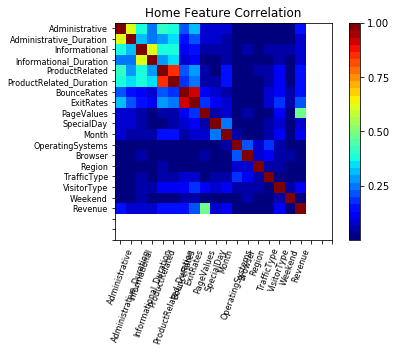

In [6]:
def correlation_matrix(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30) # color map for the heatmap. you can use other maps like: gnuplot, rainbow, brg
    cax = ax1.imshow(np.abs(df.corr()), interpolation="nearest", cmap=cmap)
    plt.title('Home Feature Correlation') # plot title
    plt.locator_params(numticks=21) # number of labels
    ax1.set_xticks(range(21)) # for x axis
    ax1.set_yticks(range(21)) # for y axis
    ax1.set_xticklabels(labels,fontsize=8, rotation=70) # rotating labels for better look
    ax1.set_yticklabels(labels,fontsize=8)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0,0.25,0.5,0.75,1.0]) # plot map indicators
    plt.show()
    
correlation_matrix(df)

In [7]:
cor = df.corr()
threshold = 0.05
cor_target = abs(cor['Revenue'])
#Selecting highly correlated features
selected = cor_target[cor_target>threshold]


In [8]:
selected1 = selected.drop('Revenue')
feature_names = selected1.index.values


In [9]:
import timeit

import pandas as pd
popular = pd.read_csv('online_shoppers_intention.csv')

In [10]:
popular['Month'] = popular['Month'].map(cal)
popular[['Weekend', 'Revenue']] = (popular[['Weekend', 'Revenue']] == True).astype(int)
popular['VisitorType'] = (popular['VisitorType'] == 'Returning_Visitor').astype(int)


In [11]:
popular.head()
from pandas.plotting  import scatter_matrix
from matplotlib import cm
x=popular[feature_names]
y=popular['Revenue']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 )
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train1= x_train
x_test1=x_test
y_train1=y_train
y_test1=y_test

In [13]:
from sklearn.tree import DecisionTreeClassifier
start = timeit.default_timer()
clf = DecisionTreeClassifier().fit(x_train,y_train)
stop = timeit.default_timer()
print ('Runtime in seconds: ', stop-start)
print ('Accuracy of Decision Tree Classifier on Training Set: {:.2f}'.format(clf.score(x_train,y_train)))
print ('Accuracy of Decision Tree Classifier on test Set: {:.2f}'.format(clf.score(x_test,y_test)))
print("")

Runtime in seconds:  0.027649499999999883
Accuracy of Decision Tree Classifier on Training Set: 1.00
Accuracy of Decision Tree Classifier on test Set: 0.86



In [14]:
from sklearn.neighbors import KNeighborsClassifier
start = timeit.default_timer()
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
stop = timeit.default_timer()
print ('Runtime in seconds: ', stop-start)
print ('Accuracy of K-NN Classifier on training set : {:.2f}'.format(knn.score(x_train,y_train1)))
print ('Accuracy of K-NN Classifier on test Set: {:.2f}'.format(knn.score(x_test,y_test1)))
print("")

Runtime in seconds:  0.03478519999999996
Accuracy of K-NN Classifier on training set : 0.90
Accuracy of K-NN Classifier on test Set: 0.88



In [15]:
from sklearn.svm import SVC
start = timeit.default_timer()
svm = SVC()
svm.fit(x_train, y_train)
stop = timeit.default_timer()
print ('Runtime in seconds: ', stop-start)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(x_train,y_train)))
print('Accuracy of SVM classifier on test set {:.2f}'.format(svm.score(x_test,y_test)))

Runtime in seconds:  0.8533799000000002
Accuracy of SVM classifier on training set: 0.88
Accuracy of SVM classifier on test set 0.89
